# Plotting univariate data in ggplot

Updating notebook 1 to also include `borough`.

### Python and R Setup

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart



In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Import packages in R

In [3]:
%%R

require('tidyverse')


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


### Read data

In [4]:
%%R

# Read data
df <- read_csv('housing_data.csv')
df

Rows: 189 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): borough
dbl (11): zip, population, pct_hispanic_or_latino, pct_asian, pct_american_i...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 189 × 12
     zip population borough  pct_hispanic_or_latino pct_asian
   <dbl>      <dbl> <chr>                     <dbl>     <dbl>
 1 11368     112088 QUEENS                    76.5      11.6 
 2 11385     107796 QUEENS                    45.0       6.46
 3 11211     103123 BROOKLYN                  24.1       5.53
 4 11208     101313 BROOKLYN                  40.6       6.01
 5 10467     101255 BRONX                     52.1       5.68
 6 11236     100844 BROOKLYN                   7.66      2.58
 7 11226      99558 BROOKLYN                  16.4       3.07
 8 11373      94437 QUEENS                    41.7

### Histogram

👉 Try It

Grab your histogram code from the previous exercise (or just use the sample below) 

- modify the code to plot one histogram per borough 
- add a meaningful title and subtitle and axis labels

_(hint: this may require you to look up how `facet_wrap` works)._

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


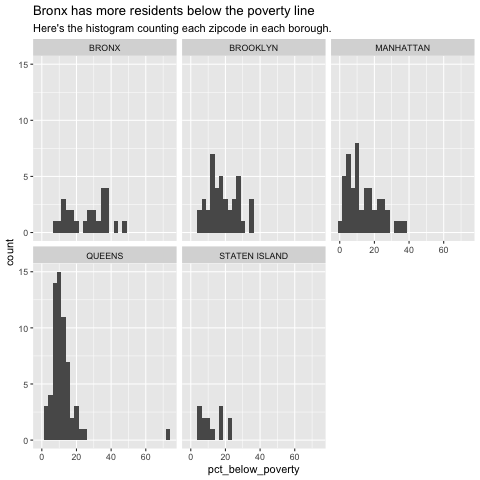

In [11]:
%%R 

ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_histogram() +
    facet_wrap(~borough) +
    labs(title="Bronx has more residents below the poverty line",
         subtitle="Here's the histogram counting each zipcode in each borough.")

### Dotplot

👉 Try It

Grab your dotplot code from the previous exercise (or just use the sample below) 

- modify the code to plot one plot per borough 
- add a meaningful title and subtitle and axis labels

_(hint: you might want to change the `y` aesthetic instead of using `facet_wrap`)._

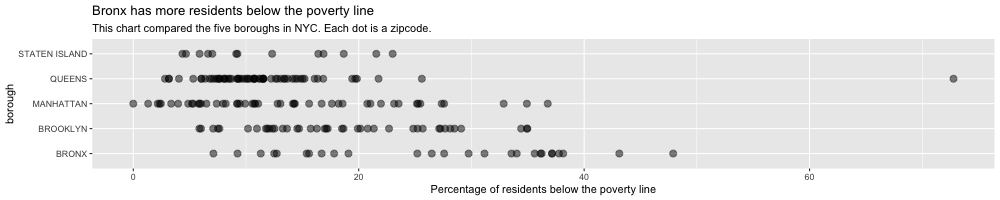

In [12]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=borough) +
    geom_point(alpha=.5, size=3)+
    labs(title="Bronx has more residents below the poverty line", 
         subtitle="This chart compared the five boroughs in NYC. Each dot is a zipcode.",
         x="Percentage of residents below the poverty line")

### Dotplot (with jitter)

👉 Try It

Grab your dotplot code from the previous exercise (or just use the sample below) 

- modify the code to plot one plot per borough 
- add a meaningful title and subtitle and axis labels

_(hint: you might also need to mess with the y axis, but also the colors of the dots)._

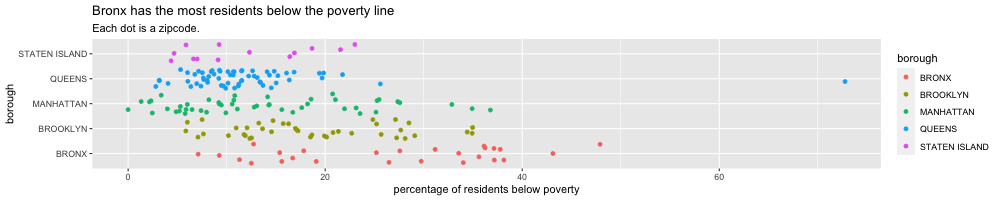

In [16]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=borough) +
    geom_jitter(aes(col=borough))+
    labs(title="Bronx has the most residents below the poverty line",
         subtitle="Each dot is a zipcode.",
         x="percentage of residents below poverty")

### Density Plot

👉 Try It

Grab your density plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough


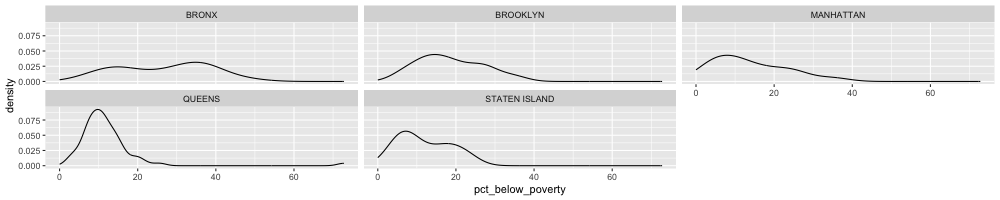

In [19]:
%%R -w 1000 -h 200
ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_density()+
    facet_wrap(~borough)

### Box and Whisker Plot
http://www.sthda.com/english/wiki/ggplot2-box-plot-quick-start-guide-r-software-and-data-visualization



👉 Try It

Grab your box and whisker plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough
- add a title and subtitle that helps tell a story with this chart

👉 Bonus
- see if you can annotate the biggest oulier


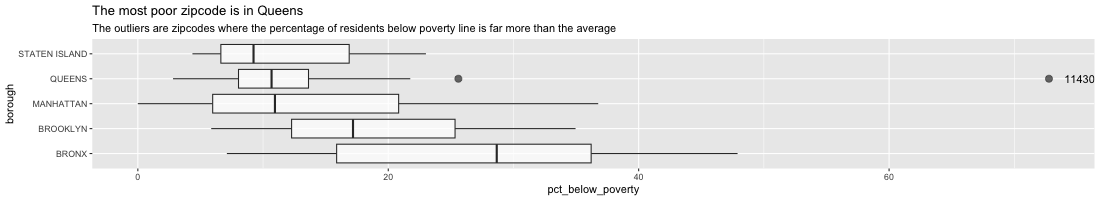

In [25]:
%%R -w 1100 -h 200

find_outlier <- function(x) {
    return(x < quantile(x, .25) - 1.5*IQR(x) | x > quantile(x,.75)+3*IQR(x))
}

df <- df %>%
    mutate(outlier = ifelse(find_outlier(pct_below_poverty), zip, NA))

ggplot(df) + 
    aes(x=pct_below_poverty, y=borough) +
    geom_boxplot(alpha=.7,outlier.size=3)+
    geom_text(aes(label=outlier), na.rm=TRUE, hjust=-.5)+
    labs(title="The most poor zipcode is in Queens", 
        subtitle="The outliers are zipcodes where the percentage of residents below poverty line is far more than the average")

### Violin Plot

👉 Try It

Grab your violin plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough
- write about how this chart looks different from the box and whisker plot and for what purpose it may be more useful
> The voilin plot shows the shape (the density curve) of the distribution and thus shows more information than the box and whisker plot. However, if we want to specify the outliers, and simplify the other non-outliers, than the box and whisker plot is more useful. 



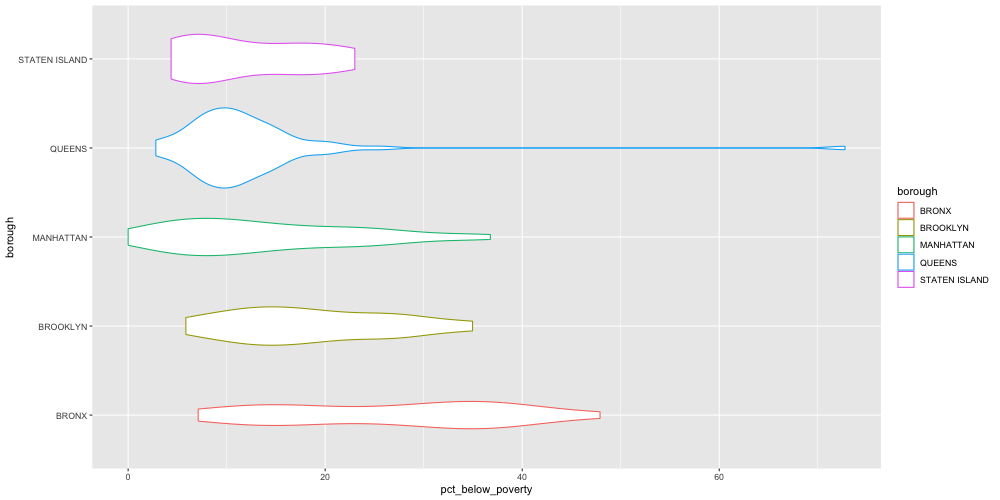

In [31]:
%%R -w 1000 -h 500

ggplot(df) + 
    aes(x=pct_below_poverty, y=borough) +
    geom_violin(aes(col=borough))

### Beeswarm 
👉 Bonus

Grab your beeswarm code from the previous exercise

- modify the code to plot one plot per borough
- add a title and subtitle that helps tell a story with this chart

Orientation inferred to be along y-axis; override with
`position_quasirandom(orientation = 'x')`


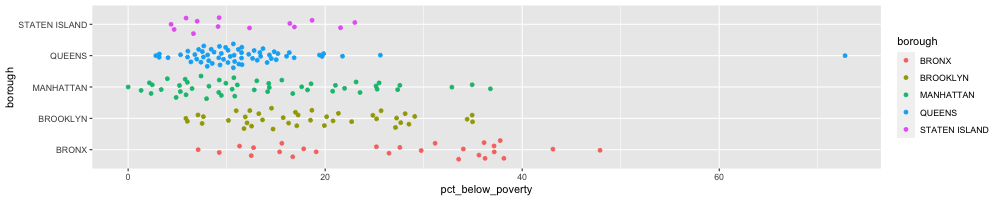

In [29]:
%%R -w 1000 -h 200
require('ggbeeswarm')
ggplot(df)+
aes(x=pct_below_poverty, y=borough)+
geom_quasirandom(aes(col=borough))